In [1]:
class Config:
    def __init__(self, samples=10000, seed=214823, noise=.15, split=(.7, .2), epochs=100, batch_size=32):
        self.samples = samples
        self.seed = seed
        self.noise = noise
        try:
            iter(split)
        except TypeError:
            raise ValueError()
        if len(split) != 2:
            raise ValueError()
        self.train_split = int(split[0] * samples)
        self.test_split = int(split[1] * samples + self.train_split)
        self.epochs = epochs
        self.batch_size = batch_size


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
config = Config()

np.random.seed(config.seed)
tf.random.set_seed(config.seed)

In [4]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

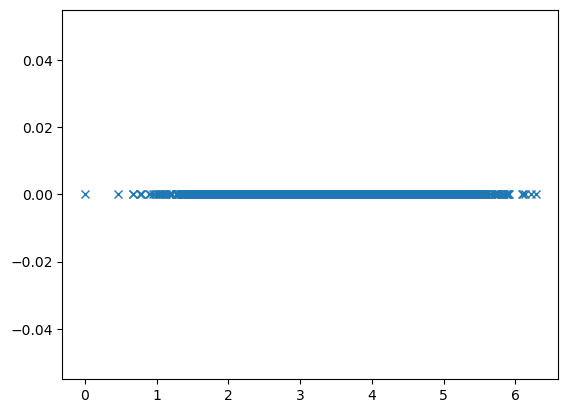

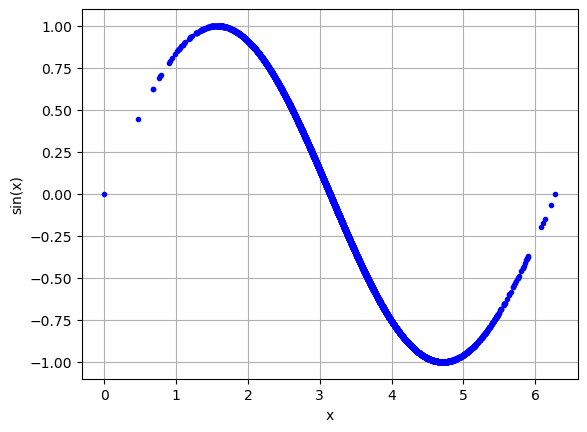

In [5]:
# Generate standard normal distribution
x_vals = np.random.standard_normal(size=config.samples)

x_vals = normalize(x_vals, 0, 2 * np.pi)

# Normalize to [0, 2π] range
# x_vals = np.mod(x_vals, 2 * np.pi)  # Wrap around using modulo
y_vals = np.sin(x_vals)

plt.plot(x_vals, np.zeros_like(x_vals), 'x')
plt.show()

plt.plot(x_vals, y_vals, 'b.')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

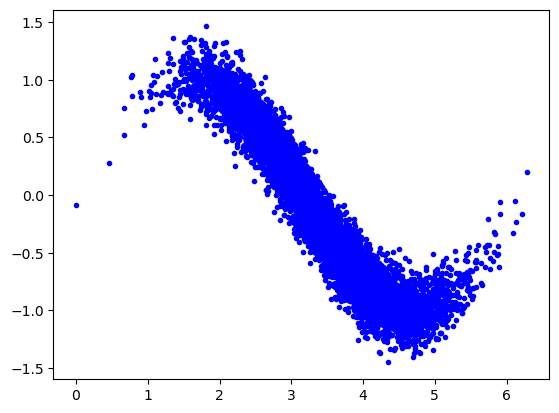

In [6]:
y_vals += config.noise * np.random.randn(*y_vals.shape)
plt.plot(x_vals, y_vals, 'b.')
plt.show()

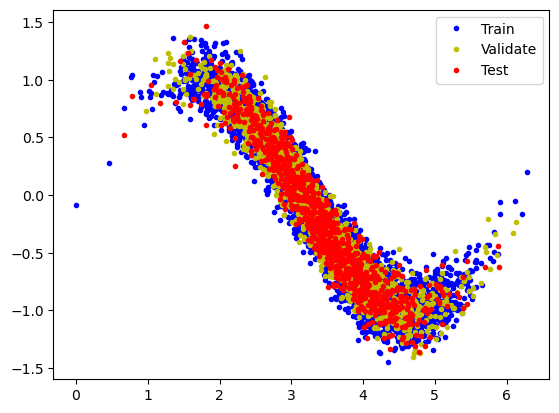

In [7]:
x_train, x_validate, x_test = np.split(x_vals, [config.train_split, config.test_split])
y_train, y_validate, y_test = np.split(y_vals, [config.train_split, config.test_split])

assert(x_train.size + x_validate.size + x_test.size) == config.samples

plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_validate, y_validate, 'y.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [8]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.summary()

/opt/anaconda3/envs/embedded/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,233 (12.63 KB)

 Trainable params: 3,233 (12.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, epochs = config.epochs, batch_size = config.batch_size, validation_data = (x_validate, y_validate))

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2351 - mae: 0.3969 - val_loss: 0.0446 - val_mae: 0.1654
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.0468 - mae: 0.1648 - val_loss: 0.0328 - val_mae: 0.1379
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0402 - mae: 0.1523 - val_loss: 0.0297 - val_mae: 0.1319
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0374 - mae: 0.1477 - val_loss: 0.0289 - val_mae: 0.1303
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0363 - mae: 0.1456 - val_loss: 0.0281 - val_mae: 0.1288
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0350 - mae: 0.1433 - val_loss: 0.0277 - val_mae: 0.1282
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0342 - mae: 0.1419 - val_loss: 0.0273 - val_mae: 0.1275
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0334 - mae: 0.1403 - val_loss: 0.0269 - val_mae: 0.1271
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0

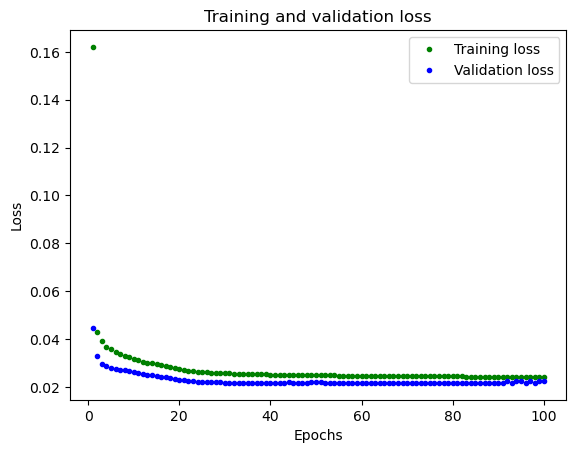

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

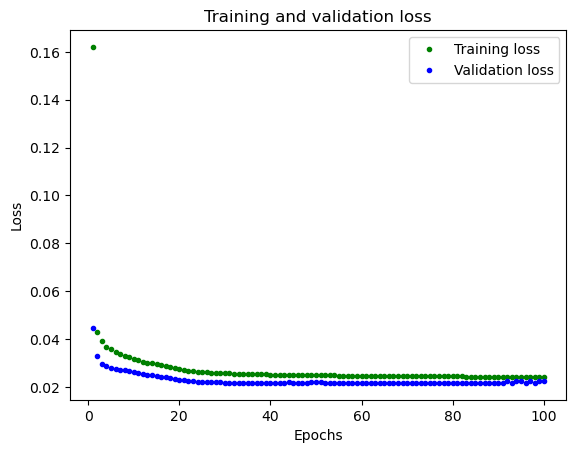

In [11]:
SKIP = 0
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

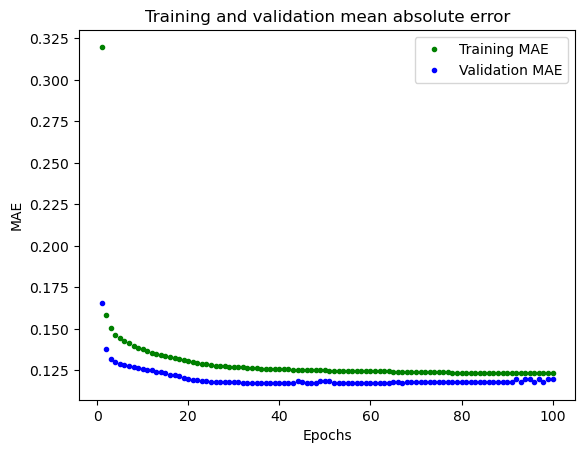

In [12]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


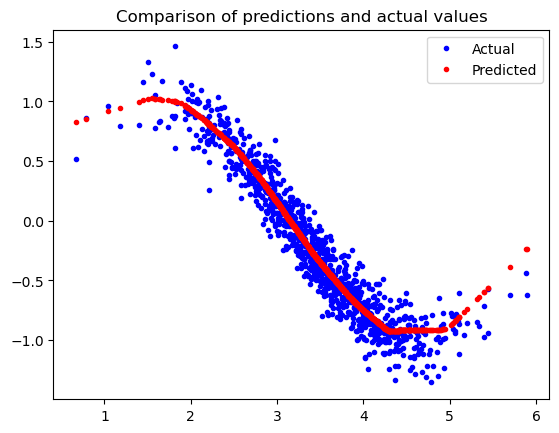

In [13]:
pred = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, pred, 'r.', label='Predicted')
plt.legend()
plt.show()